import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [15]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/59

make measure image

In [8]:
def_img = io.imread("image\\10.15.2020 Heptane-80%water20%ethanol\\frame 3\\1-45-21 PM\\10.15.2020 (3) 0712.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

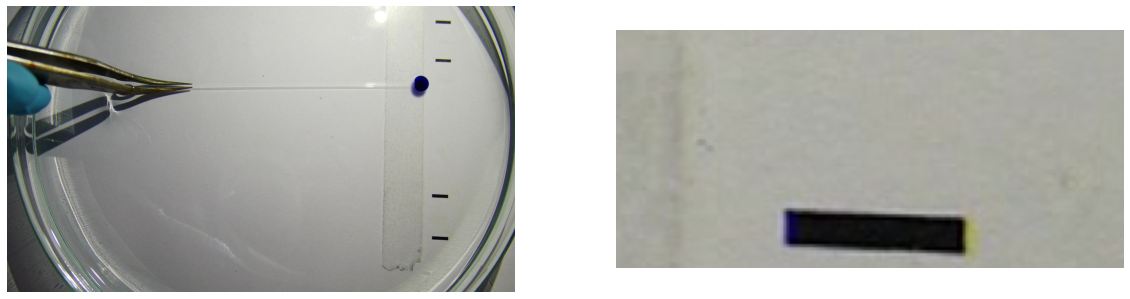

In [12]:
measure_im = crop(def_img, ((650, 350), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

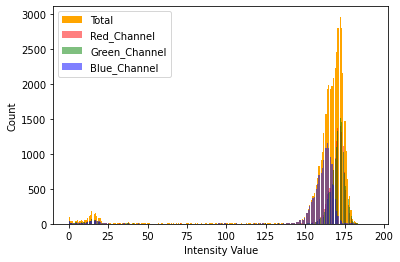

In [13]:
plot_histogram(measure_im)

[67, 57]
[70, 116]


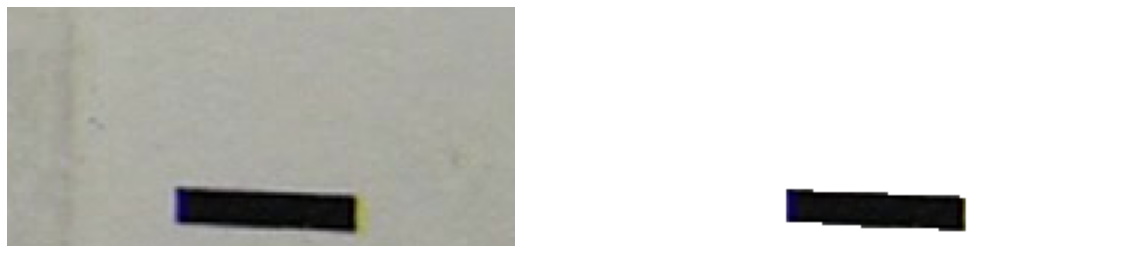

length of picture is  59.07622195096772 pixel


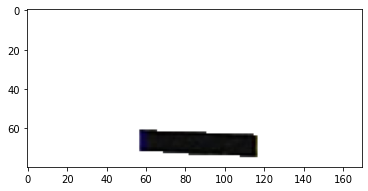

In [14]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

59 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 59


find definition length on 2217 picture

(1080, 1920, 3) (75, 920, 3)


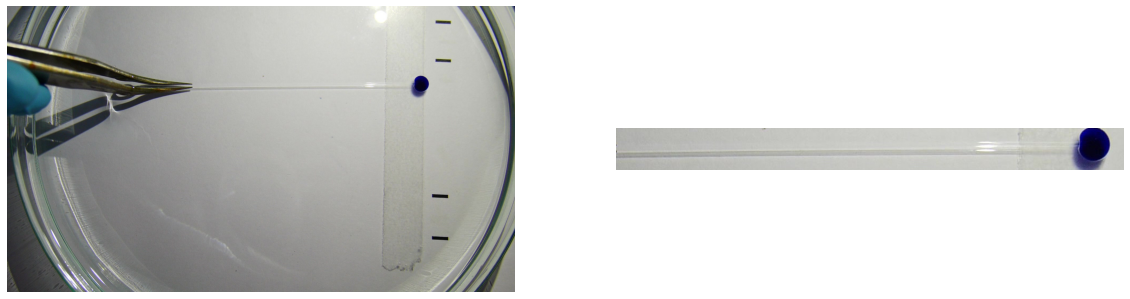

In [72]:
def_crop_im = crop(def_img, ((265, 740), (700, 300), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

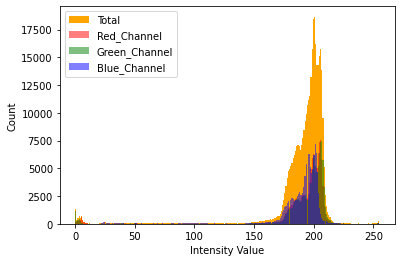

In [31]:
plot_histogram(def_crop_im)

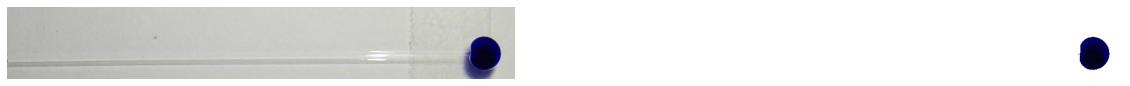

In [32]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[85, 837]
[85, 893]
ldef  56.0 pixel


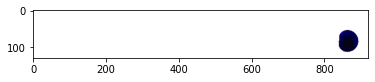

In [33]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0712 to 0765

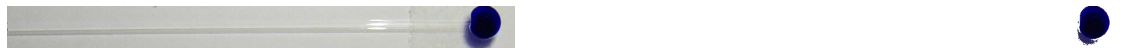

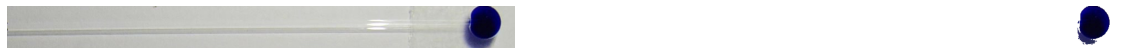

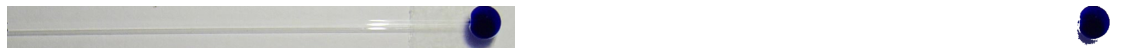

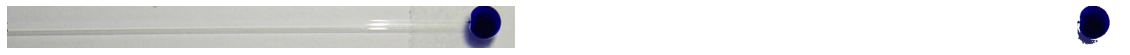

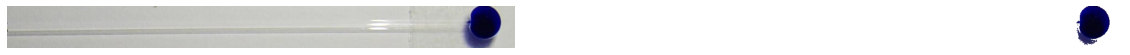

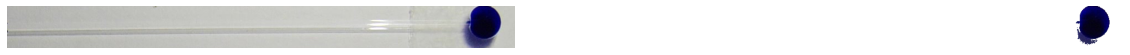

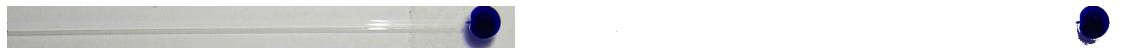

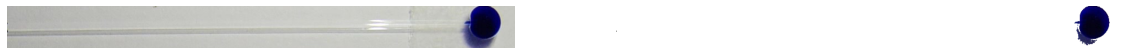

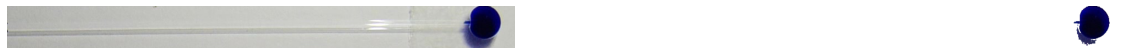

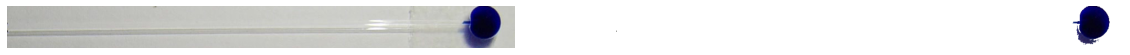

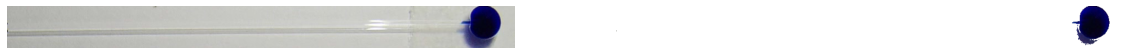

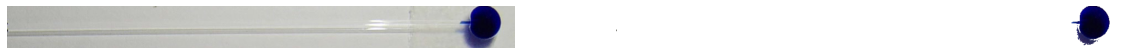

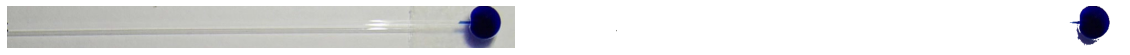

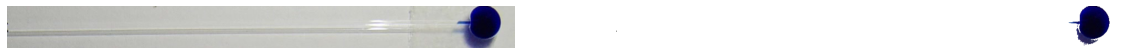

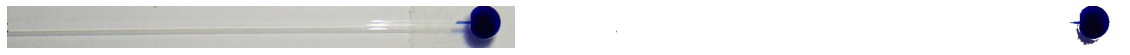

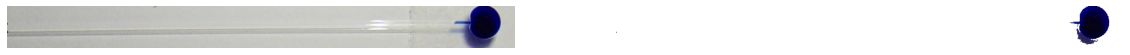

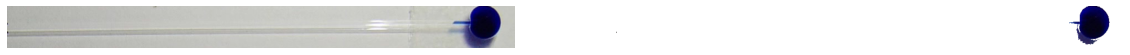

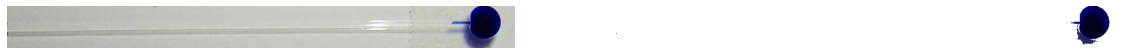

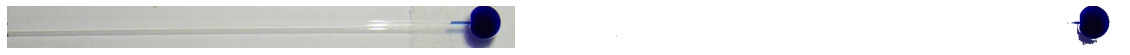

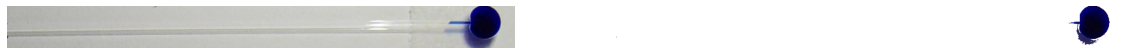

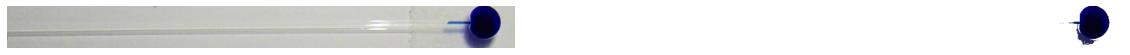

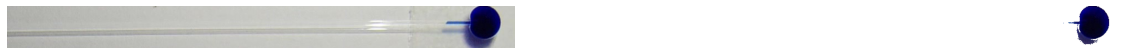

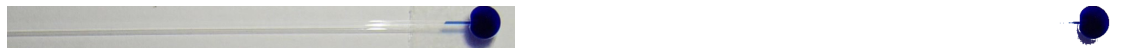

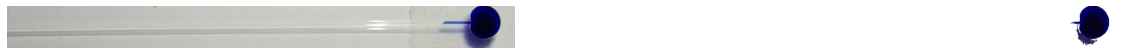

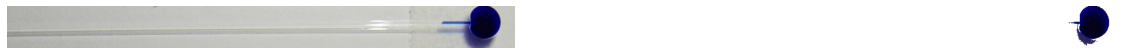

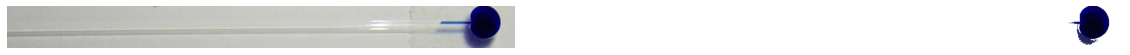

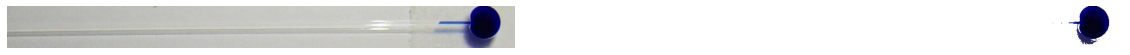

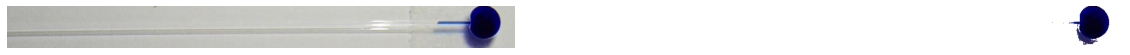

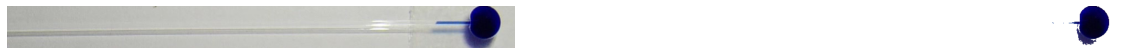

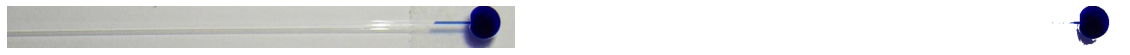

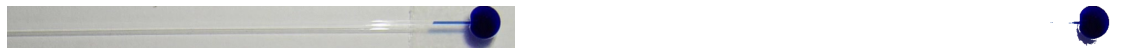

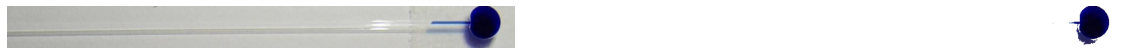

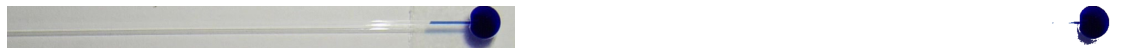

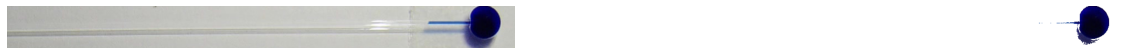

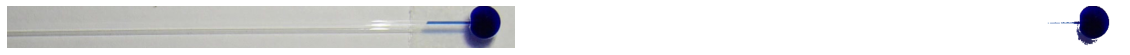

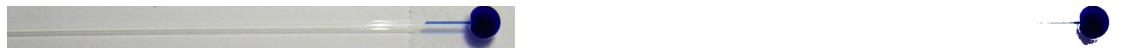

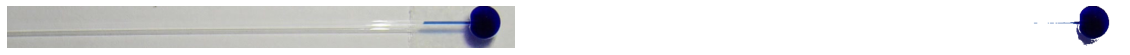

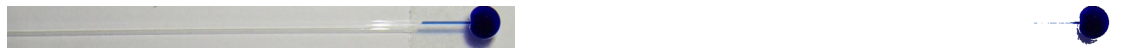

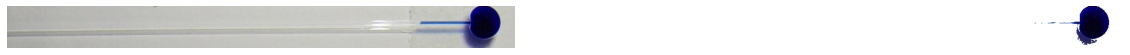

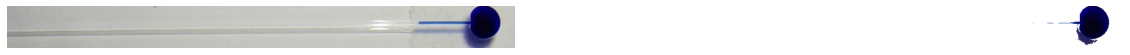

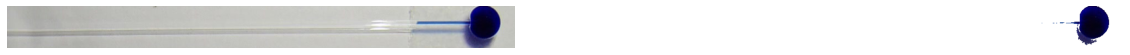

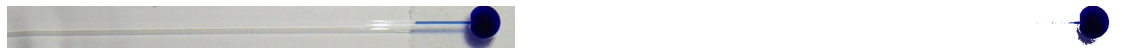

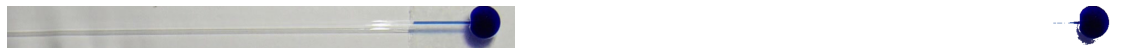

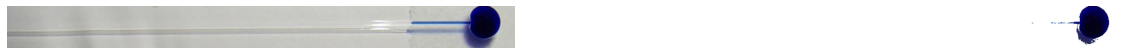

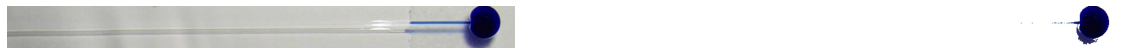

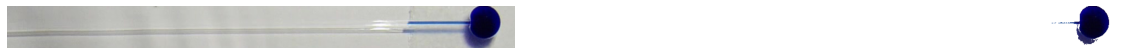

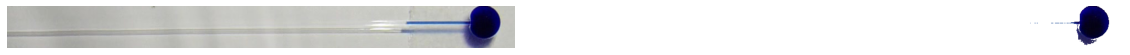

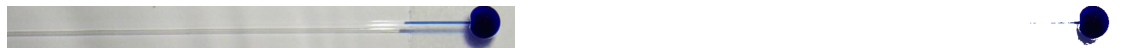

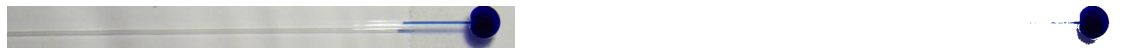

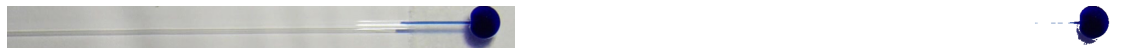

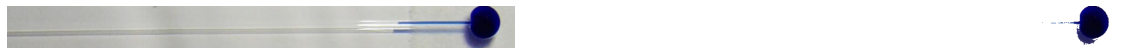

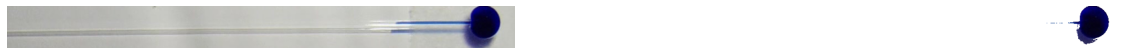

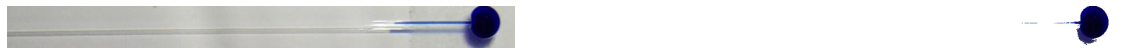

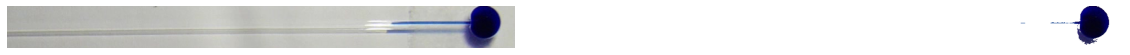

In [75]:
number_of_picture = 712
thresh = 50
template1 = []
l_def = 56.0
#765-712 = 53
for i in range(54):
    if(True) :   
        image = mpimg.imread( "image\\10.15.2020 Heptane-80%water20%ethanol\\frame 3\\1-45-21 PM\\10.15.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((265, 740), (700, 300), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):

In [58]:
number_of_picture = 712
thresh = 45
template1 = []
l_def = 56.0
#765-712 = 53
for i in range(54):
    if(True) :   
        image = mpimg.imread( "image\\10.15.2020 Heptane-80%water20%ethanol\\frame 3\\1-45-21 PM\\10.15.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((210, 740), (700, 300), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [74]:
print(template1)
print(len(template1))

[3, 837, 5, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 837, 37, 39, 39, 42, 45, 48, 47, 49, 52, 53, 56, 56, 64, 71, 74, 77, 80, 82, 85, 85, 89, 94, 95, 101, 103, 105, 106, 105, 105, 100, 104, 96, 111, 114]
54


find length on crop value 2 from 0766 to 2228 
2229 - 2424 blur image 

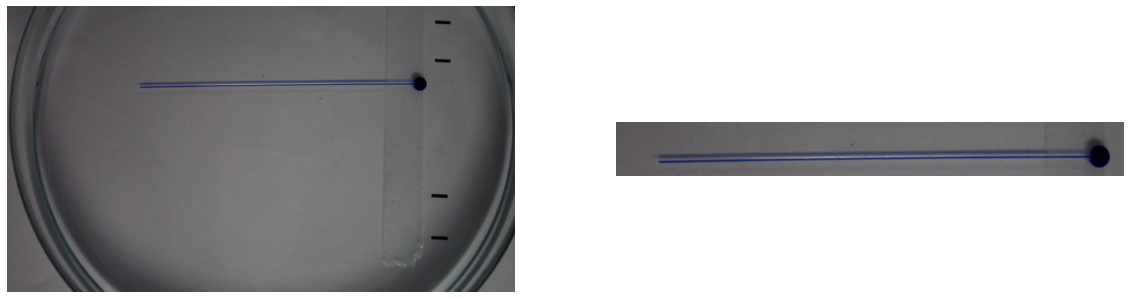

In [41]:
image = mpimg.imread( "image\\10.15.2020 Heptane-80%water20%ethanol\\frame 3\\1-45-21 PM\\10.15.2020 (3) " + str(2228).zfill(4) + ".jpg" )
crop_image = crop(image, ((210, 740), (400, 300), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [50]:
number_of_picture = 766
thresh = 45
template2 = []
l_def = 56.0
#2228-766 = 1462
for i in range(1463):
    if( True) :
        image = mpimg.imread( "image\\10.15.2020 Heptane-80%water20%ethanol\\frame 3\\1-45-21 PM\\10.15.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((210, 740), (400, 300), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [51]:
print(template2)
print(len(template2))

[49, 24, 102, 48, 77, 44, 72, 16, 15, 32, 22, 15, 14, 11, 48, 9, 11, 46, 45, 44, 52, 14, 10, 10, 18, 105, 31, 18, 239, 13, 32, 11, 13, 14, 6, 6, 12, 10, 7, 8, 47, 12, 10, 8, 13, 15, 11, 9, 7, 8, 46, 14, 30, 31, 9, 12, 47, 11, 8, 10, 9, 29, 29, 30, 6, 14, 7, 7, 366, 6, 7, 363, 374, 48, 53, 79, 300, 317, 68, 50, 50, 79, 229, 100, 87, 87, 374, 86, 412, 399, 428, 414, 100, 87, 86, 445, 99, 100, 101, 46, 27, 435, 9, 14, 40, 10, 83, 85, 7, 7, 7, 6, 6, 6, 6, 7, 17, 31, 17, 6, 6, 8, 506, 315, 426, 428, 102, 103, 507, 502, 102, 525, 526, 542, 534, 526, 549, 553, 555, 540, 89, 29, 525, 559, 541, 564, 562, 565, 565, 573, 575, 573, 580, 574, 575, 589, 592, 590, 593, 585, 589, 588, 601, 605, 612, 605, 578, 621, 620, 626, 630, 630, 634, 634, 636, 638, 642, 644, 645, 648, 651, 652, 653, 657, 656, 661, 662, 668, 667, 668, 673, 674, 673, 677, 682, 682, 685, 689, 690, 686, 693, 698, 701, 699, 701, 705, 706, 707, 712, 714, 716, 718, 718, 720, 720, 726, 726, 730, 732, 733, 736, 738, 740, 742, 744, 744, 74

concat 2 template and calculate pixel to centimeter

In [60]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [61]:
print(l_array)

[0.01694915 0.01694915 0.01694915 ... 9.016949   9.016949   9.008474  ]


export data to exel

In [62]:
import pandas as pd

In [63]:
print(len(l_array))

1517


In [64]:
data = []
num_img = 712
for i in range(len(l_array)):
    data.append(( " 10.15.2020 (3) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-80-20(3)_10.15.2020_1-45-21-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


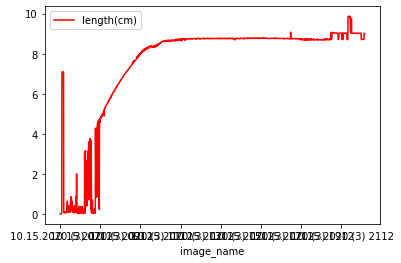

In [65]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()